# Question 2
## Arturo Fornés Arvayo A01227071

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import csv
import pandas as pd

In [4]:
df = pd.read_csv('MyData.csv')
df

,x,y,c
0,1,5,0
1,2,6,0
2,3,7,0
3,4,8,0
4,5,9,0
5,7,2,0
6,8,3,0
7,2,7,1
8,3,8,1
9,5,1,1


In [5]:
names = ["Nearest Neighbors", "Decission Tree", "Logistic Regression", "SVM", "Gaussian Naive Bayes"]

classifiers = [
    KNeighborsClassifier(10),
    DecisionTreeClassifier(criterion='entropy'),
    LogisticRegression(),
    SVC(kernel='linear', C=1, gamma=1),
    GaussianNB()
]

In [7]:
y = df["c"]
X = df.drop("c", axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=ord('*'))

In [16]:
results = []
for name, clf in zip(names, classifiers):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    score = clf.score(X_test, y_test)
    print("%s:\t\t\t%8.4f"%(name, score))
    results.append({ "name":name, "score": score })

Nearest Neighbors:			  0.3333
Decission Tree:			  0.6667
Logistic Regression:			  1.0000
SVM:			  1.0000
Gaussian Naive Bayes:			  0.3333


/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
results_df = pd.DataFrame(results)

In [18]:
results_df

,name,score
0,Nearest Neighbors,0.333333
1,Decission Tree,0.666667
2,Logistic Regression,1.000000
3,SVM,1.000000
4,Gaussian Naive Bayes,0.333333


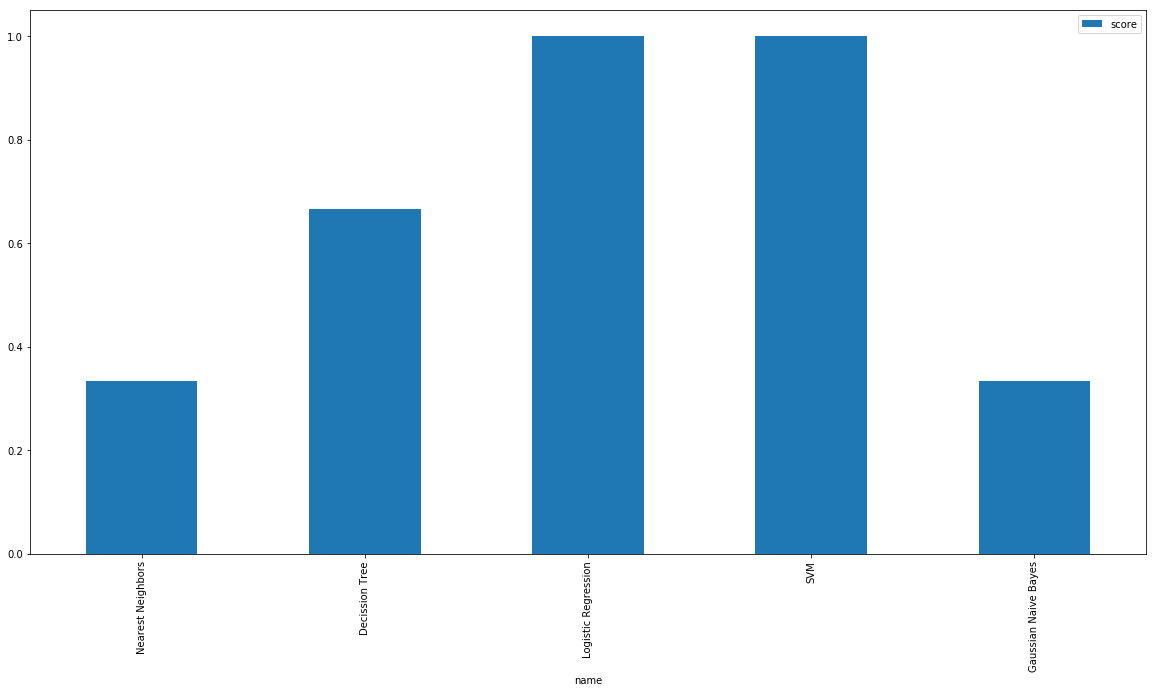

In [22]:
results_df.plot.bar(x="name", figsize=(20,10))